# Building a Single Domain with CstarSpecEngine

This notebook demonstrates how to use `CstarSpecEngine` to build a single domain configuration from `domains.yml`.


## CstarSpecEngine Overview

`CstarSpecEngine` is the high-level interface for managing ROMS model configurations and builds. It provides methods to:

- **Generate single domains**: Build one domain at a time using `generate_domain()`
- **Generate multiple domains**: Build all domains from `domains.yml` using `generate_all()`
- **Run simulations**: Execute model runs using `run_all()`

The engine reads domain configurations from `domains.yml` and model specifications from `models.yml`, orchestrating the complete workflow from input generation through model compilation.


## Domain Configuration

Domain configurations are defined in `domains.yml`. Each domain entry specifies:

- **Grid parameters**: Resolution, size, location, vertical levels
- **Time range**: Start and end dates for the simulation
- **Open boundaries**: Which boundaries are open (north, south, east, west)
- **Partitioning**: Parallel execution configuration
- **Model specification**: Which model configuration to use (from `models.yml`)

The domain name used here (`_test-tiny`) must match an entry in `domains.yml`.


## Workflow Stages

The `generate_domain()` method executes the complete workflow:

1. **PRECONFIG**: Initialize blueprint and grid object
2. **Source Data**: Download and prepare required datasets (GLORYS, UNIFIED, SRTM15, etc.)
3. **POSTCONFIG**: Generate all input files (grid, initial conditions, forcing)
4. **BUILD**: Render configuration templates and compile the model executable
5. **Pre-run**: Prepare for execution (partitioning, etc.)

The method returns a `CstarSpecBuilder` instance that can be used to run the simulation.


## Generate Domain

Create a `CstarSpecEngine` instance and generate a single domain. The domain name must match an entry in `domains.yml`.

**Parameters:**
- `domain_name`: Name of the domain from `domains.yml`
- `clobber_inputs`: If `True`, overwrite existing input files
- Other optional parameters: `clobber_source_data`, `partition_files`, `test`, `compile_time_settings`, `run_time_settings`


In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from glob import glob
import time

import cson_forge
import cstar.execution.handler as handler

import xarray as xr

ERROR 1: PROJ: proj_create_from_database: Open of /home/x-mlong/.local/share/mamba/envs/cson-forge-v0/share/proj failed


In [ ]:
engine = cson_forge.CstarSpecEngine(domains_file="pacific-domains.yml")
builder = engine.generate_all(clobber_inputs=False)
builder

✔️  Using existing GLORYS_REGIONAL file for 2024-01-01: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_ccs-12km_20240101.nc
✔️  Using existing GLORYS_REGIONAL file for 2024-01-02: cmems_mod_glo_phy_my_0.083deg_P1D-m_REGIONAL_ccs-12km_20240102.nc
✔️  TPXO dataset verified at: /anvil/projects/x-ees250129/cson-forge-data/source-data/TPXO/TPXO10.v2
✔️  Using existing BGC dataset: /anvil/projects/x-ees250129/cson-forge-data/source-data/UNIFIED_BGC/BGCdataset.nc

▶️  [1/8] Writing ROMS grid...

▶️  [2/8] Generating initial conditions...


/home/x-mlong/codes/cson-forge/cson_forge/_core.py:1370: UserWarning: Failed to compare grid datasets: [Errno 2] No such file or directory: '/Users/mclong/cson-forge-data/input-data/cson_roms-marbl_v0.1_ccs-12km/cson_roms-marbl_v0.1_ccs-12km_grid.nc'
  if not self._file_blueprint_data_match(partition_files=partition_files) or clobber:
/home/x-mlong/.local/share/mamba/envs/cson-forge-v0/lib/python3.13/site-packages/dask/array/reductions.py:292: RuntimeWarning: All-NaN slice encountered
  return np.nanmin(x_chunk, axis=axis, keepdims=keepdims)


[########################################] | 100% Completed | 80.89 s

▶️  [3/8] Generating surface forcing...
[########################################] | 100% Completed | 5.64 sms

▶️  [4/8] Generating surface forcing...
[########################################] | 100% Completed | 204.69 ms

▶️  [5/8] Generating boundary forcing...


[WARNING] The northern boundary is divided by land. It would be safer (but slower and more memory-intensive) to use `apply_2d_horizontal_fill = True`.


[########################################] | 100% Completed | 1.26 sms

▶️  [6/8] Generating boundary forcing...
[########################################] | 100% Completed | 30.77 s

▶️  [7/8] Generating tidal forcing...
[########################################] | 100% Completed | 6.73 sms

▶️  [8/8] Generating river forcing...


[WARNING] No records found at or after the end_time: 2024-01-02 00:00:00.



✅ All input files generated.

[INFO] 🛠️ Configuring ROMSSimulation
[INFO] 🔧 Setting up ROMSExternalCodeBase...
[INFO] 🔧 Setting up MARBLExternalCodeBase...
[INFO] 📦 Fetching compile-time code...
[INFO] 📦 Fetching runtime code... 
[INFO] 📦 Fetching input datasets...
[INFO] Partitioning /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/input/input_datasets/cson_roms-marbl_v0.1_ccs-12km_grid.nc into (16,20)
[INFO] Partitioning /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/input/input_datasets/cson_roms-marbl_v0.1_ccs-12km_initial_conditions.nc into (16,20)
[INFO] Partitioning /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/input/input_datasets/cson_roms-marbl_v0.1_ccs-12km_tidal.nc into (16,20)
[INFO] Partitioning /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/input/input_datasets/cson_roms-marbl_v0.1_ccs-12km_river.nc into (16,20)
[INFO

CstarSpecBuilder(description='California Current System', model_name='cson_roms-marbl_v0.1', grid_name='ccs-12km', grid_kwargs={'nx': 224, 'ny': 440, 'size_x': 2688, 'size_y': 5280, 'center_lon': -134.5, 'center_lat': 39.6, 'rot': 33.3, 'N': 60, 'hc': 250.0, 'theta_s': 6.0, 'theta_b': 6.0, 'verbose': True, 'hmin': 5.0}, open_boundaries=OpenBoundaries(north=True, south=True, east=True, west=True), partitioning=PartitioningParameterSet(documentation='', locked=False, hash=None, n_procs_x=16, n_procs_y=20), start_date=datetime.datetime(2024, 1, 1, 0, 0), end_date=datetime.datetime(2024, 1, 2, 0, 0), cdr_forcing=None, blueprint=RomsMarblBlueprint(name='cson_roms-marbl_v0.1_ccs-12km', description='California Current System', application='roms_marbl', state='notset', valid_start_date='2024-01-01T00:00:00', valid_end_date='2024-01-02T00:00:00', code=ROMSCompositeCodeRepository(roms={'documentation': '', 'locked': False, 'location': 'https://github.com/CWorthy-ocean/ucla-roms.git', 'commit': '

## Run Simulation

Execute the model simulation. The `run()` method handles the execution and returns an execution handler for monitoring the run.


In [3]:
exec_handler = builder.run()
print(exec_handler)

[INFO] Running srun -n 320 /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/input/compile_time_code/roms /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/input/runtime_code/cson_roms-marbl_v0.1_ccs-12km.in
[INFO] Submitting job: sbatch /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/work/cson_roms-marbl_v0-1_ccs-12km_20240101-20240102.sh


In [4]:
dot_count = 0
while not handler.ExecutionStatus.is_terminal(exec_handler.status):
    print("...", end="", flush=True)
    dot_count += 3
    if dot_count >= 100:
        print()  # New line after ~100 dots
        dot_count = 0
    time.sleep(30)

if exec_handler.status == handler.ExecutionStatus.COMPLETED:
    builder.post_run()
else:
    raise Exception("Model run failed")

.....................................................................[INFO] Joining netCDF files output_bgc_dia.20240101000000.*.nc...
[INFO] Joining netCDF files output_bgc.20240101000000.*.nc...
[INFO] Joining netCDF files output_rst.20240101120000.*.nc...
[INFO] Joining netCDF files output_rst.20240102000000.*.nc...
[INFO] Joining netCDF files output_his.20240101000000.*.nc...
[INFO] done spatially joining /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/output/output_his.20240101000000.nc
[INFO] done spatially joining /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/output/output_bgc.20240101000000.nc
[INFO] done spatially joining /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/output/output_rst.20240101120000.nc
[INFO] done spatially joining /anvil/scratch/x-mlong/cson-forge-run/cson_roms-marbl_v0.1_ccs-12km_20240101-20240102/output/output_rst.20240102000000.nc
[INFO] do

In [5]:
# Find the latest cstar log file in the run_path directory
log_files = sorted(glob(str(exec_handler.run_path / "cstar_process_*.out")), reverse=True)
if log_files:
    latest_log = Path(log_files[0])
    print(f"Latest log file: {latest_log}")
    print(f"Modified: {latest_log.stat().st_mtime}")
    latest_log
else:
    print("No cstar log files found")

No cstar log files found


## Visualize Model Output

After the model run completes, you can load and visualize the output data. The code below:

1. **Finds output files**: Uses `glob` to locate all BGC (biogeochemical) output files in the `JOINED_OUTPUT` directory
2. **Opens the dataset**: Uses `xarray.open_mfdataset()` to open multiple NetCDF files as a single dataset
3. **Applies land mask**: Masks out land points using the grid's `mask_rho` variable
4. **Plots a variable**: Creates a plot of dissolved inorganic carbon (DIC) at the first time step and bottom vertical level (`s_rho=-1`)

The `JOINED_OUTPUT` directory contains the spatially-joined output files created by `post_run()`, which combine partitioned output files from parallel runs into single file

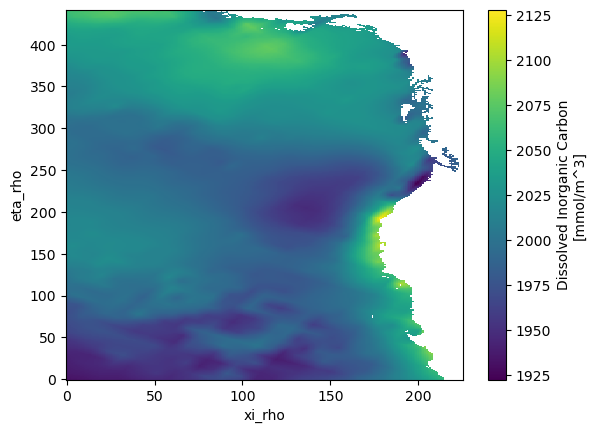

In [7]:
files = glob(str(builder.run_output_dir / "output" / "joined_output" / ("output_bgc.*")))
ds = xr.open_mfdataset(files)
ds = ds.where(builder.grid.ds.mask_rho)
ds.DIC.isel(time=0, s_rho=-1).plot()

## Save Executed Notebook

Save a timestamped copy of this notebook to `executed/forge/{os}/` for reproducibility and record-keeping. The copy is organized by operating system (macOS or Ubuntu/Linux) to track execution history across different platforms.

The saved notebook includes all executed cells and outputs, providing a complete record of the simulation workflow for future reference.

In [9]:
# Save the notebook copy
cson_forge.save_notebook_copy(notebook_name="CStarSpecEngine-build-one.ipynb")

Notebook copy saved to: executed/forge/RCAC_anvil/CStarSpecEngine-build-one_RCAC_anvil.ipynb


PosixPath('executed/forge/RCAC_anvil/CStarSpecEngine-build-one_RCAC_anvil.ipynb')